In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import model, analysis, util, implicit_curve

In [2]:
import importlib
util = importlib.reload(util)
analysis = importlib.reload(analysis)
implicit_curve = importlib.reload(implicit_curve)
model = importlib.reload(model)
compute = True

## Options

In [3]:
options = dict(
    bg_kwargs=dict(
        #theta0=0.001,
        sigma_eff=model.paper_sigma_eff * 10,
        use_cosine_potential=True,
        use_temp_dep_axion_mass=True,
    ),
    decay_kwargs=dict(
    )
)
f_a = 3e14
H_inf = 2e10

In [15]:
#analysis.make_time_plots(1e7, f_a, 1e8, H_inf, **options["bg_kwargs"])

## Contour Plot of the Asymmetry in the Parameter Space for fixed $f_a$

In [18]:
name = "change_everything_eta_B.pkl"
if compute:
    m_a_s, Gamma_phi_s, eta_B_numerical = analysis.sample_parameter_space_numerical(f_a, H_inf, kwargs=options)
    util.save_data(name, m_a_s, Gamma_phi_s, eta_B_numerical)
else:
    m_a_s, Gamma_phi_s, eta_B_numerical = util.load_data(name)
_, _, _, eta_B_paper = util.load_data("paper_eta_B.pkl")

/home/jana/Documents/master-project/axion_spg/model.py:283: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


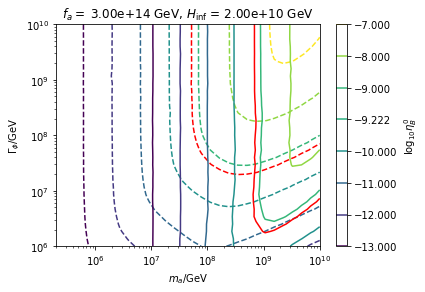

In [20]:
levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))

# paper
CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B_paper), levels=levels, linestyles="dashed")
CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

# numerical result
CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B_numerical), levels=levels)
plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

# labels
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
plt.tight_layout()
plt.title(f"$f_a =$ {f_a:.2e} GeV, $H_\\mathrm{{inf}}$ = {H_inf:.2e} GeV")
plt.savefig(util.make_plot_path("sbg_leptogenesis_axion_osc_contour_plot_change_everything.pdf"))

## Correct Asymmetry as a Function of $f_a$

In [22]:
name = "change_everything_curves.pkl"
compute = True
if compute:
    f_a_list = [4e10, 1e13, 1e14, 1e15, 4e15]
    curves = [analysis.compute_correct_curve(f_a, model.calc_H_inf_max(f_a) / 10,
                                            **options) for f_a in tqdm(f_a_list)]
    util.save_data(name, f_a_list, curves)
else:
    f_a_list, curves = util.load_data(name)

INFO: falied to find initial point
INFO: stopped because of convergence failure of newton iteration
INFO: stopped because of convergence failure of newton iteration


/home/jana/Documents/master-project/axion_spg/model.py:283: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


INFO: stopped because of convergence failure of newton iteration
INFO: stopped because of convergence failure of newton iteration


/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


INFO: stopped because of convergence failure of newton iteration


/home/jana/Documents/master-project/axion_spg/model.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


INFO: stopped because of convergence failure of newton iteration


/home/jana/Documents/master-project/axion_spg/analysis.py:169: RuntimeWarning: invalid value encountered in log10
  goal_fn = lambda p: np.log10(compute_B_asymmetry(10**p[0], f_a, 10**p[1], H_inf, bg_kwargs=bg_kwargs, decay_kwargs=decay_kwargs)) - np.log10(eta_B_observed)


INFO: falied to find initial point



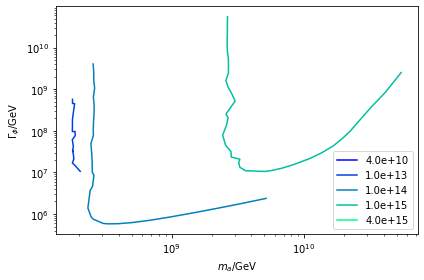

In [23]:
cmap = plt.get_cmap("winter")
for x, f_a, (curve_m_a, curve_Gamma_phi) in zip(np.linspace(0, 1, len(f_a_list)), f_a_list, curves):
    if len(curve_m_a) == 1:
        plt.plot(curve_m_a, curve_Gamma_phi, "or", label=f"{f_a:.1e}")
    plt.plot(curve_m_a, curve_Gamma_phi, color=cmap(x), label=f"{f_a:.1e}")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
#scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(f_a_list), vmax=max(f_a_list)))
#cbar = plt.colorbar(scalar_map)
#cbar.set_label(r"$f_a / \mathrm{GeV}$") # TODO: the colorbar is not correct!!!!
plt.legend()
plt.tight_layout()
plt.savefig(util.make_plot_path("correct_eta_B_curves_change_everything.pdf"))

## Find the minimal $m_a$ and $\Gamma_\varphi$

In [34]:
minimal_m_a, minimal_Gamma_phi = analysis.find_minimal_m_a_and_Gamma_phi()
print(f"minimal: m_a = {minimal_m_a:e}; Gamma_phi = {minimal_Gamma_phi:e}")

step: 1


/home/jana/Documents/master-project/axion_spg/model.py:265: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:269: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


delta: inf
step: 2
delta: 0.049461870976101205
minimal: m_a = 1.216937e+06; Gamma_phi = 2.483573e+06
